In [2]:
import ccxt

binance = ccxt.binance()
okex = ccxt.okex()
huobi = ccxt.huobi
ftx=ccxt.ftx()
coinbasepro = ccxt.coinbasepro()
cmc = ccxt.coinmarketcap

In [22]:
binance.fetch_order_book('BTC/USDT')
coinbasepro.fetch_order_book('BTC/USDT')
okex.fetch_order_book('BTC/USDT')
ftx.fetch_order_book('BTC/USDT')

{'symbol': 'BTC/USDT',
 'bids': [[57493.0, 2.2291],
  [57491.0, 1.3463],
  [57490.0, 1.34],
  [57482.0, 0.3222],
  [57481.0, 1.3384],
  [57477.0, 0.0405],
  [57473.0, 7.9066],
  [57469.0, 0.3358],
  [57468.0, 0.7837],
  [57467.0, 10.0725],
  [57466.0, 0.0619],
  [57462.0, 1.8906],
  [57461.0, 0.0181],
  [57460.0, 0.0683],
  [57459.0, 0.023],
  [57458.0, 1.925],
  [57457.0, 0.035],
  [57456.0, 0.0363],
  [57455.0, 0.0017],
  [57454.0, 0.136]],
 'asks': [[57494.0, 0.569],
  [57495.0, 0.3],
  [57497.0, 0.0365],
  [57499.0, 1.2015],
  [57501.0, 0.869],
  [57502.0, 0.0063],
  [57510.0, 0.8033],
  [57511.0, 0.3203],
  [57513.0, 0.2761],
  [57517.0, 0.0963],
  [57524.0, 0.0063],
  [57525.0, 0.5221],
  [57526.0, 0.0091],
  [57529.0, 5.16],
  [57530.0, 0.0216],
  [57533.0, 0.1407],
  [57536.0, 0.1365],
  [57537.0, 0.1],
  [57538.0, 0.023],
  [57546.0, 0.0363]],
 'timestamp': None,
 'datetime': None,
 'nonce': None}

In [3]:
#ftx

import requests 
    print "downloading with requests"
    url = 'http://www.pythontab.com/test/demo.zip' 
    r = requests.get(url) 
    print(r)

TypeError: fetch_funding_rate() missing 1 required positional argument: 'symbol'

In [ ]:
#币安ccxt

#币安现货
binance_spot_bids_taker_price = binance.fetch_order_book('BTCUSDT')['bids'][0][0]
binance_spot_bids_taker_depth = binance.fetch_order_book('BTCUSDT')['bids'][0][1]
binance_spot_bids_maker_price = binance.fetch_order_book('BTCUSDT')['bids'][1][0]
binance_spot_bids_maker_depth = binance.fetch_order_book('BTCUSDT')['bids'][1][1]

binance_spot_asks_taker_price = binance.fetch_order_book('BTCUSDT')['asks'][0][0]
binance_spot_asks_taker_depth = binance.fetch_order_book('BTCUSDT')['asks'][0][1]
binance_spot_asks_maker_price = binance.fetch_order_book('BTCUSDT')['asks'][1][0]
binance_spot_asks_maker_depth = binance.fetch_order_book('BTCUSDT')['asks'][1][1]


#币安合约U本位
binance_futures_bids_taker_price =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['bids'][0][0]
binance_futures_bids_taker_depth =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['bids'][0][1]
binance_futures_bids_maker_price =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['bids'][1][0]
binance_futures_bids_maker_depth =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['bids'][1][1]

binance_futures_asks_taker_price =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['asks'][0][0]
binance_futures_asks_taker_depth =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['asks'][0][1]
binance_futures_asks_maker_price =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['asks'][1][0]
binance_futures_asks_maker_depth =  binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})['asks'][1][1]


binance_futures_bookticker = binance.fapiPublicGetTickerBookticker({"symbol":'BTCUSDT'}) #return all data if no symbol

#bookticker = best price/qty, between asks and bids
#perp = 'BTCUSDT'
#quartly = 'BTCUSDT_211231' or other dates, 获取当前月份来确定日期


#币安资金费率time moduele
from datetime import datetime
from datetime import date

#第几轮收取资金费率BNE时区
first = 2 * 3600000
second = 10 * 3600000
third = 18 * 3600000
round_interval = 8 * 3600 * 1000

#收取资金费率存在误差
uncertainty = 60 * 1000 #1min

#选择一天中第几轮
charge_round = first

#获取当前日期
date = str(date.today())
#当前日期转ms
ms = round(datetime.strptime(date,'%Y-%m-%d').timestamp() * 1000)
#当前ms加上第几轮
designate_time = ms + charge_round


#币安获取资金费率U本位

#当前
binance_last_fundingrate = binance.fapiPublicGetPremiumindex({"symbol":'BTCUSDT'})['lastFundingRate']

#历史
binance_historical_fundingrate = binance.fapiPublicGetFundingrate({"symbol":'BTCUSDT',
                                                                   'startTime':ms - 1 * round_interval,
                                                                   'endTime':ms})#数据要pandas处理一下
#历史数据处理/单个
import pandas as pd
df = pd.DataFrame(binance.fapiPublicGetFundingrate({"symbol":'BTCUSDT',
                                  'startTime':ms - 15 * round_interval,
                                  'endTime':ms}))
#历史数据处理/多个/所有


#币本位 sub 'fapi' to 'dapi'

In [4]:
import time

UTC_interval = 36000000 #BNE time -10hours to UTC

now_ms = round(time.time()*1000)
now_UTC_ms = round(time.time()*1000) - UTC_interval

lookback_interval = 15#days
lookback_interval = lookback_interval * 24 * 3600 * 1000



In [3]:
binance.fapiPublicGetDepth({"symbol":'BTCUSDT'})

{'lastUpdateId': '988883077037',
 'E': '1638363867872',
 'T': '1638363867863',
 'bids': [['57343.61', '0.026'],
  ['57343.57', '0.012'],
  ['57343.51', '0.746'],
  ['57343.40', '0.140'],
  ['57342.87', '0.003'],
  ['57341.34', '0.876'],
  ['57341.31', '2.390'],
  ['57341.29', '0.088'],
  ['57340.73', '0.175'],
  ['57339.76', '0.042'],
  ['57339.25', '0.456'],
  ['57339.24', '1.738'],
  ['57338.54', '0.022'],
  ['57338.53', '0.061'],
  ['57337.77', '0.087'],
  ['57337.60', '0.250'],
  ['57337.36', '0.524'],
  ['57337.04', '0.050'],
  ['57337.00', '0.017'],
  ['57336.47', '0.087'],
  ['57336.42', '0.054'],
  ['57336.41', '0.088'],
  ['57336.23', '0.351'],
  ['57336.09', '0.171'],
  ['57335.39', '0.331'],
  ['57334.48', '0.009'],
  ['57334.37', '0.001'],
  ['57334.20', '0.250'],
  ['57334.05', '0.087'],
  ['57333.99', '0.001'],
  ['57333.80', '0.166'],
  ['57333.54', '0.025'],
  ['57333.37', '0.060'],
  ['57333.00', '0.013'],
  ['57332.92', '0.002'],
  ['57331.86', '1.220'],
  ['57331.56'

In [5]:
import pandas as pd
#币安资金费率time moduele
from datetime import datetime
from datetime import date

#第几轮收取资金费率BNE时区
first = 2 * 3600000
second = 10 * 3600000
third = 18 * 3600000
round_interval = 8 * 3600 * 1000

#收取资金费率存在误差
uncertainty = 60 * 1000 #1min

#选择一天中第几轮
charge_round = first

#获取当前日期
date = str(date.today())
#当前日期转ms
ms = round(datetime.strptime(date,'%Y-%m-%d').timestamp() * 1000)
#当前ms加上第几轮
designate_time = ms + charge_round

df = pd.DataFrame(binance.fapiPublicGetFundingrate({
                                  'startTime':ms - 15 * round_interval,
                                  'endTime':ms}))
print(df)

NameError: name 'ms' is not defined

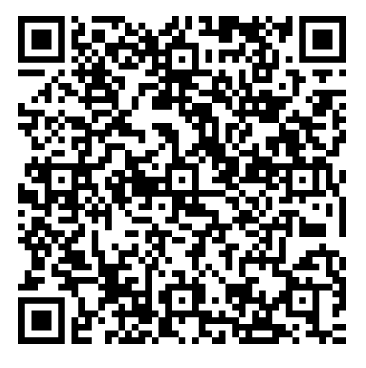

In [ ]:
#币安websocket存入sql
from binance.client import Client
import sqlalchemy
import pandas as pd
from binance import BinanceSocketManager
from binance.exceptions import BinanceAPIException
import time

api_key='LvYJH1hqNb3gWg4Ysn9LoWrQlbwsGI7OzLmKIzVVNuP7PTTF8aAEKcjgknmm0fxE'
api_secret='KWKjl61lDkoS1xtETLXGu25XjJYDnyTroFpyXEks2B4Ob6DudMg6LyzQ9STdkaJu'
client=Client(api_key, api_secret)



#现货1min close
bsm = BinanceSocketManager(client)
pair = 'BTCUSDT'
socket = bsm.kline_socket(pair,'1m')
engine = sqlalchemy.create_engine('sqlite:///'+pair+'stream.db')

def createframe(msg):
    df = pd.DataFrame.from_dict(dict([('Time',[msg['E']]),('Close',[msg['k']['c']])]))
    df['Time'] = pd.to_datetime(df['Time'], unit='ms' ) #Untested
    df['Close'] = float(df['Close'])
    df=df.iloc[:,:2]
    df.columns=['Time','Close']
    return df

while True:
    await socket.__aenter__()
    msg = await socket.recv()
    frame = createframe(msg)
    frame.to_sql(pair, engine, if_exists='append', index=False)
    print(frame)
    

#现货orderbook/bookticker

#合约
    
    


                     Time    Close
0 2021-11-29 13:26:32.280  4325.81
                     Time    Close
0 2021-11-29 13:26:34.287  4327.59
                     Time    Close
0 2021-11-29 13:26:34.287  4327.59
                     Time    Close
0 2021-11-29 13:26:36.540  4329.99
                     Time    Close
0 2021-11-29 13:26:36.540  4329.99
                     Time    Close
0 2021-11-29 13:26:38.607  4329.38
                     Time    Close
0 2021-11-29 13:26:38.607  4329.38
                     Time    Close
0 2021-11-29 13:26:40.709  4328.49
                     Time    Close
0 2021-11-29 13:26:40.709  4328.49
                     Time   Close
0 2021-11-29 13:26:42.816  4327.9
                     Time   Close
0 2021-11-29 13:26:42.816  4327.9
                     Time    Close
0 2021-11-29 13:26:44.978  4327.99
                     Time    Close
0 2021-11-29 13:26:44.978  4327.99
                     Time    Close
0 2021-11-29 13:26:47.114  4327.98
                     Tim